In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

"""-------------------------------------"""

import seaborn as sns

"""-------------------------------------"""

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from nltk.stem import WordNetLemmatizer 

from nltk.tokenize import RegexpTokenizer

"""-------------------------------------"""

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

"""-------------------------------------"""
import matplotlib.pyplot as plt
% matplotlib inline

"""-------------------------------------"""

from scipy.sparse import coo_matrix


"""--------------Imported-------------"""

'--------------Imported-------------'

# Unzipping the data

## importing required modules 
    from zipfile import ZipFile 
  
## specifying the zip file name 
    file_name = "./data/papers.csv.zip"
    with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall('./data/') 
    print('Done!') 

In [2]:
df=pd.read_csv('./data/papers.csv')

In [3]:
df.head(5)

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [4]:
print(df.columns)
print(df.info())

Index(['id', 'year', 'title', 'event_type', 'pdf_name', 'abstract',
       'paper_text'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7241 entries, 0 to 7240
Data columns (total 7 columns):
id            7241 non-null int64
year          7241 non-null int64
title         7241 non-null object
event_type    2422 non-null object
pdf_name      7241 non-null object
abstract      7241 non-null object
paper_text    7241 non-null object
dtypes: int64(2), object(5)
memory usage: 396.1+ KB
None


In [5]:
len(df['abstract'][df['abstract']!='Abstract Missing'])

3924

In [6]:
df1=df[df['abstract']!='Abstract Missing']
del df

In [7]:
df1

,id,year,title,event_type,pdf_name,abstract,paper_text
941,1861,2000,Algorithms for Non-negative Matrix Factorization,NaN,1861-algorithms-for-non-negative-matrix-factor...,Non-negative matrix factorization (NMF) has pr...,Algorithms for Non-negative Matrix\nFactorizat...
1067,1975,2001,Characterizing Neural Gain Control using Spike...,NaN,1975-characterizing-neural-gain-control-using-...,Spike-triggered averaging techniques are effec...,Characterizing neural gain control using\nspik...
2384,3163,2007,Competition Adds Complexity,NaN,3163-competition-adds-complexity.pdf,It is known that determinining whether a DEC-P...,Competition adds complexity\n\nJudy Goldsmith\...
2385,3164,2007,Efficient Principled Learning of Thin Junction...,NaN,3164-efficient-principled-learning-of-thin-jun...,We present the first truly polynomial algorith...,Efficient Principled Learning of Thin Junction...
2388,3167,2007,Regularized Boost for Semi-Supervised Learning,NaN,3167-regularized-boost-for-semi-supervised-lea...,Semi-supervised inductive learning concerns ho...,Regularized Boost for Semi-Supervised Learning...
2389,3168,2007,Simplified Rules and Theoretical Analysis for ...,NaN,3168-simplified-rules-and-theoretical-analysis...,We show that under suitable assumptions (prima...,Simplified Rules and Theoretical Analysis for\...
2390,3169,2007,Predicting human gaze using low-level saliency...,NaN,3169-predicting-human-gaze-using-low-level-sal...,"Under natural viewing conditions, human observ...",Predicting human gaze using low-level saliency...
2393,3171,2007,Mining Internet-Scale Software Repositories,NaN,3171-mining-internet-scale-software-repositori...,Large repositories of source code create new c...,Mining Internet-Scale Software Repositories\n\...
2394,3172,2007,Continuous Time Particle Filtering for fMRI,NaN,3172-continuous-time-particle-filtering-for-fm...,We construct a biologically motivated stochast...,Continuous Time Particle Filtering for fMRI\n\...
2396,3174,2007,An online Hebbian learning rule that performs ...,NaN,3174-an-online-hebbian-learning-rule-that-perf...,Independent component analysis (ICA) is a powe...,An online Hebbian learning rule that performs\...


In [8]:
df1['wordcount']=df1['abstract'].apply(lambda x: len(str(x).split(" ")))

In [9]:
#Identifying common words

commfreq = pd.Series(' '.join(df1['abstract']).split()).value_counts()[:20]
commfreq

the         29793
of          20918
a           16339
and         13626
to          12869
in           8980
that         7838
is           7666
for          7169
We           6238
on           5579
we           5167
with         4512
this         3677
as           3643
are          3529
an           3366
by           3197
can          2953
learning     2825
dtype: int64

In [10]:
#Identifying common words

uncommfreq = pd.Series(' '.join(df1['abstract']).split()).value_counts()[-50:]
uncommfreq

|V|\log|V|$.               1
chaos,''                   1
intra-                     1
finetune                   1
distribution's             1
Breiman's                  1
VIP                        1
(typed                     1
WikiNav,                   1
nonparametrics.            1
(VPI)                      1
(causal)                   1
faces.                     1
(Hopkins                   1
$D_i$                      1
eigenmodel,                1
SDDs                       1
CD,                        1
irrepresentability.        1
slow-speed                 1
(CSP),                     1
responding,                1
disseminate                1
elapsed                    1
state-evolution            1
hinge-loss.                1
antagonistic.              1
(D)                        1
Community                  1
photos),                   1
browser                    1
reinforcement--learning    1
DCGAN,                     1
(CMAB-T)                   1
Hash          

In [11]:
stop_words = set(stopwords.words("english"))

In [12]:
# Custom Stop Words
new_words=["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words=stop_words.union(new_words)

# Text Preprocessing
    - Extracting texts only
    - lowercase the text
    - removing tags
    - replacing the special characters
    - Lemmatization e.g. rocks -> rock, cars-> car
    - Stemming e.g. “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”

In [13]:
# Text Preprocessing (Cleaning and Normalisation)
corpus=[]

for i in range(0,len(df1)):
    
    text=re.sub(r'[^a-zA-Z]',' ', df1['abstract'].iloc[i])
    
    text=text.lower()
    
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)

    text=re.sub(r"(\\d|\\W)+"," ",text)
    
    text=text.split()
        
    ps=PorterStemmer()
    
    lem = WordNetLemmatizer()
    
    text=[lem.lemmatize(word) for word in text if not word in stop_words]
    
    text=" ".join(text)
    
    corpus.append(text)

# Data Exploration

After cleaning we get the corpus. We are going to visualize the text using worlcloud

In [14]:
wordcloud = WordCloud(background_color='white',stopwords=stop_words,max_words=100,
                      max_font_size=50,random_state=42).generate(str(corpus))

#wordcloud class, random state to generate the corpus of words

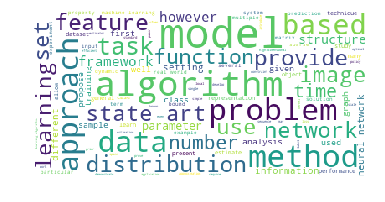

In [15]:
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
fig.savefig("word1.png", dpi=900)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
import re

cv=CountVectorizer(max_df=0.80, stop_words=stop_words, max_features=1000, ngram_range=(1,3))

In [17]:
X=cv.fit_transform(corpus)

### An encoded vector is returned with a length of the entire vocabulary. 

In [18]:
list(cv.vocabulary_.keys())[:10]

['non',
 'negative',
 'matrix',
 'factorization',
 'useful',
 'decomposition',
 'multivariate',
 'data',
 'different',
 'multi']

# Top Unigrams

In [19]:
#Most frequently occuring unigrams
def top_uni(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words=vec.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    
    
    words_freq=[(word, sum_words[0, idx]) for word,idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:n]

In [20]:
top_words = top_uni(corpus, n=20)
top_words_df = pd.DataFrame(top_words)
top_words_df.columns=["Word", "Freq"]

[Text(0,0,'model'),
 Text(0,0,'algorithm'),
 Text(0,0,'learning'),
 Text(0,0,'method'),
 Text(0,0,'problem'),
 Text(0,0,'data'),
 Text(0,0,'approach'),
 Text(0,0,'function'),
 Text(0,0,'based'),
 Text(0,0,'network'),
 Text(0,0,'time'),
 Text(0,0,'paper'),
 Text(0,0,'result'),
 Text(0,0,'task'),
 Text(0,0,'distribution'),
 Text(0,0,'propose'),
 Text(0,0,'state'),
 Text(0,0,'feature'),
 Text(0,0,'image'),
 Text(0,0,'performance')]

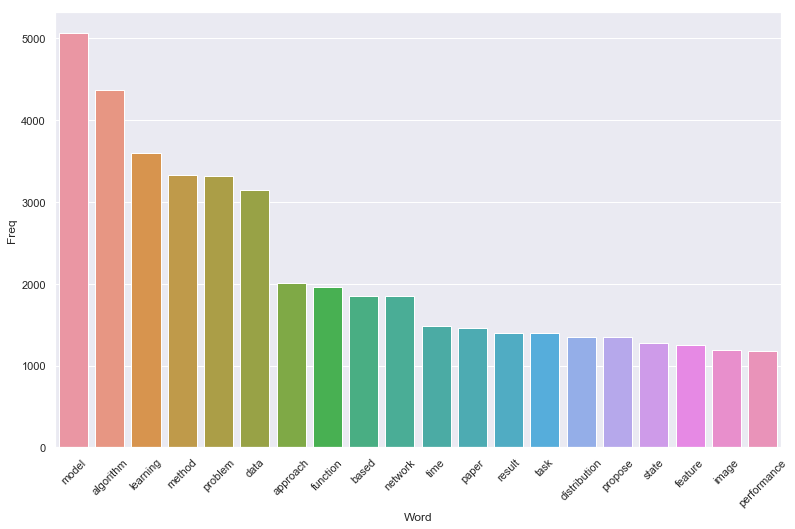

In [21]:
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_words_df)
g.set_xticklabels(g.get_xticklabels(), rotation=45)

# Top Bigrams

In [22]:
def top_bi(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),max_features=2000).fit(corpus)
    
    bag_of_words=vec1.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    
    
    words_freq=[(word, sum_words[0, idx]) for word,idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:n]

In [23]:
top_bigrams = top_bi(corpus, n=20)
top_bigrams_df = pd.DataFrame(top_bigrams)
top_bigrams_df.columns=["Bigrams", "Freq"]

[Text(0,0,'state art'),
 Text(0,0,'neural network'),
 Text(0,0,'machine learning'),
 Text(0,0,'real world'),
 Text(0,0,'learning algorithm'),
 Text(0,0,'high dimensional'),
 Text(0,0,'lower bound'),
 Text(0,0,'data set'),
 Text(0,0,'paper propose'),
 Text(0,0,'optimization problem'),
 Text(0,0,'graphical model'),
 Text(0,0,'experimental result'),
 Text(0,0,'loss function'),
 Text(0,0,'reinforcement learning'),
 Text(0,0,'low rank'),
 Text(0,0,'gradient descent'),
 Text(0,0,'gaussian process'),
 Text(0,0,'learning problem'),
 Text(0,0,'convergence rate'),
 Text(0,0,'stochastic gradient')]

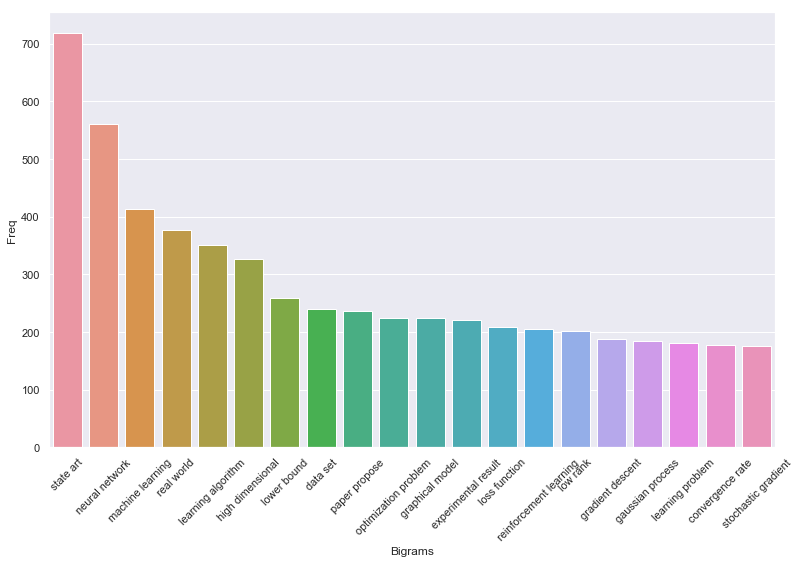

In [24]:
#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bigrams", y="Freq", data=top_bigrams_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

# Top Tri Grams

In [25]:
def top_tri(corpus, n=None):
    vec2 = CountVectorizer(ngram_range=(3,3),max_features=2000).fit(corpus)
    
    bag_of_words=vec2.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    
    
    words_freq=[(word, sum_words[0, idx]) for word,idx in vec2.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:n]

In [26]:
top_trigrams = top_tri(corpus, n=20)
top_trigrams_df = pd.DataFrame(top_trigrams)
top_trigrams_df.columns=["Trigrams", "Freq"]

[Text(0,0,'convolutional neural network'),
 Text(0,0,'deep neural network'),
 Text(0,0,'stochastic gradient descent'),
 Text(0,0,'state art performance'),
 Text(0,0,'real world datasets'),
 Text(0,0,'recurrent neural network'),
 Text(0,0,'state art method'),
 Text(0,0,'real world data'),
 Text(0,0,'markov decision process'),
 Text(0,0,'low rank matrix'),
 Text(0,0,'synthetic real world'),
 Text(0,0,'semi supervised learning'),
 Text(0,0,'multi armed bandit'),
 Text(0,0,'outperforms state art'),
 Text(0,0,'state art result'),
 Text(0,0,'latent variable model'),
 Text(0,0,'markov chain monte'),
 Text(0,0,'chain monte carlo'),
 Text(0,0,'principal component analysis'),
 Text(0,0,'empirical risk minimization')]

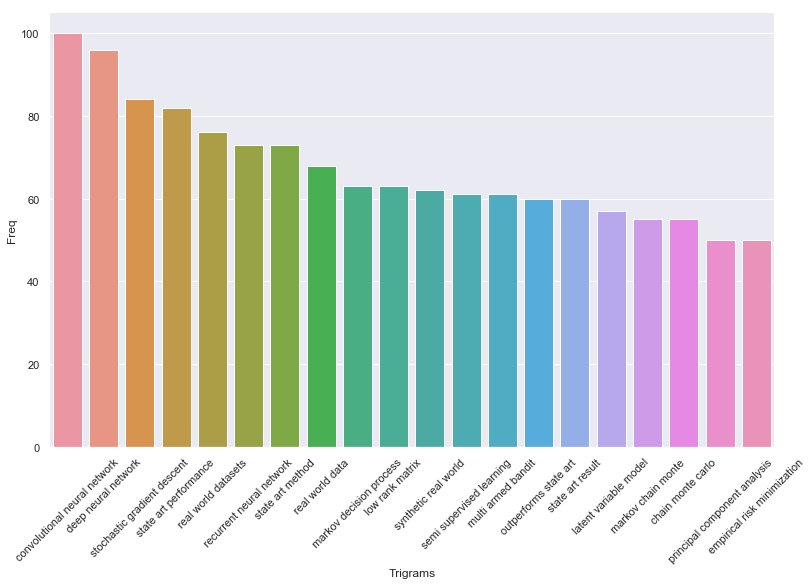

In [27]:
#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(13,8)})
i=sns.barplot(x="Trigrams", y="Freq", data=top_trigrams_df)
i.set_xticklabels(i.get_xticklabels(), rotation=45)

# Converting to a matrix of integers

    - TF-IDF vectoriser  penalizes words that appear several times across the document. 
    - TF-IDF are word frequency scores that highlight words that are more important to the context rather than those that appear frequently across documents.
    - TF-IDF consists of 2 components:
        - TF - Termfrequency
        - IDF - Inverse document frequency
<img src="https://1.bp.blogspot.com/-tnzPA6dDtTU/Vw6EWm_PjCI/AAAAAAABDwI/JatHtUJb4fsce9E-Ns5t02_nakFtGrsugCLcB/s1600/%25E8%259E%25A2%25E5%25B9%2595%25E5%25BF%25AB%25E7%2585%25A7%2B2016-04-14%2B%25E4%25B8%258A%25E5%258D%25881.39.07.png" width=450 height=450>
<img src="https://cdn-images-1.medium.com/max/1600/1*8XpbsR4HdAHBXy5MgpIyug.png" width=450 height=450>

# TF-IDF

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer


tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)


TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [29]:
# get feature names
feature_names=cv.get_feature_names()

# fetch document for which keywords needs to be extracted
doc=corpus[532]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

### Based on the TF-IDF scores, we can extract the words with the highest scores to get the keywords for a document.

In [30]:
#A sparse matrix in COOrdinate format. 
def coo_sorted(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

In [31]:
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [32]:
sorted_items=coo_sorted(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,30)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
present theory compositionality stochastic optimal control showing task optimal controller constructed certain primitive primitive feedback controller pursuing agenda mixed proportion much progress making towards agenda compatible agenda present task resulting composite control law provably optimal problem belongs certain class class rather general yet number unique property bellman equation made linear even non linear discrete dynamic give rise compositionality developed special case linear dynamic gaussian noise framework yield analytical solution e non linear mixture linear quadratic regulator without requiring final cost quadratic generally natural set control primitive constructed applying svd green function bellman equation illustrate theory context human arm movement idea optimality compositionality prominent field motor control yet hard reconcile work make possible

Keywords:
control 0.385
linear 0.32
non linear 0.232
equation 0.232
quadratic 0.217
yet 0.202
optimal 